
Processing target: CO(GT)
Best contamination for CO(GT): 0.033


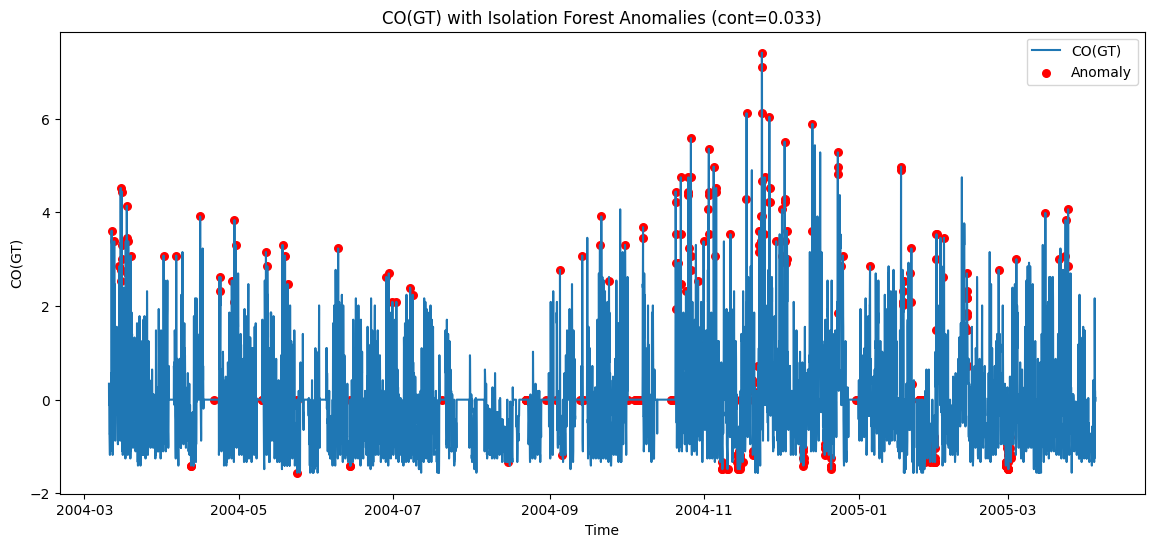

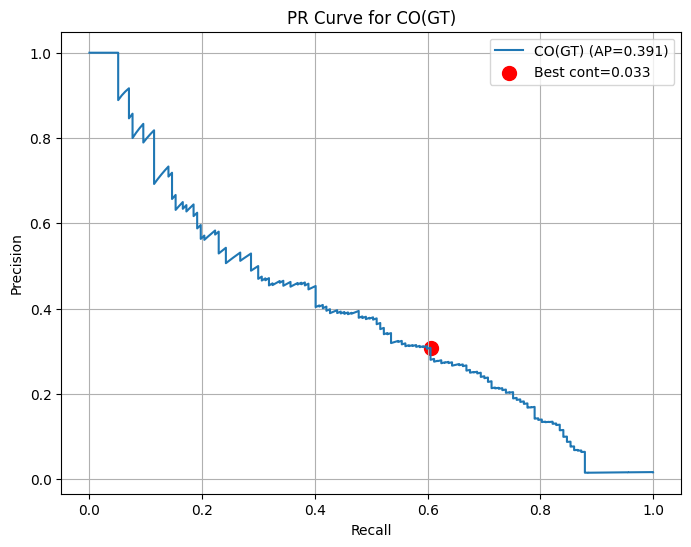


Processing target: NMHC(GT)
Best contamination for NMHC(GT): 0.01


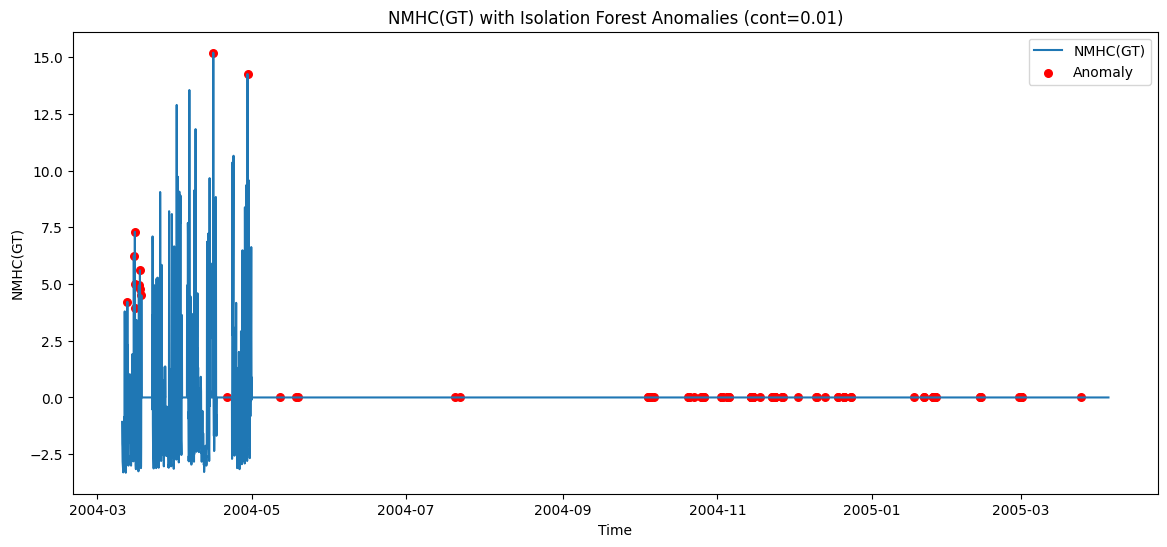

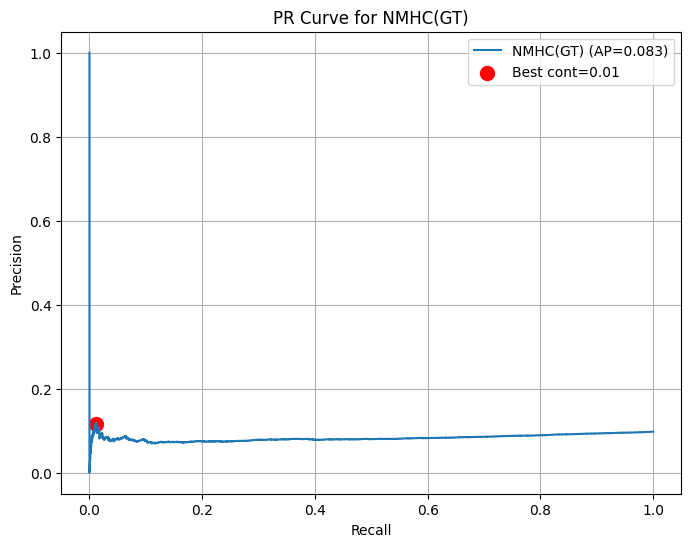


Processing target: C6H6(GT)
Best contamination for C6H6(GT): 0.02


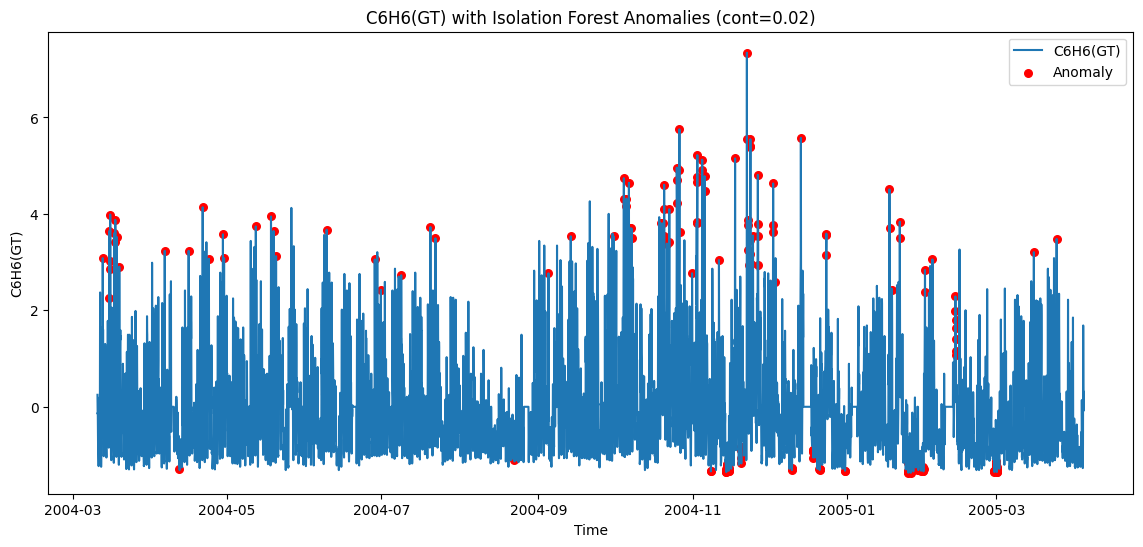

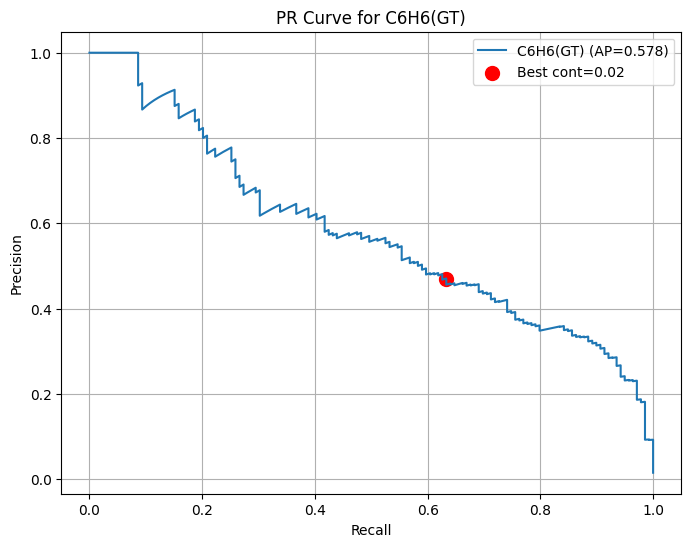


Processing target: NOx(GT)
Best contamination for NOx(GT): 0.1


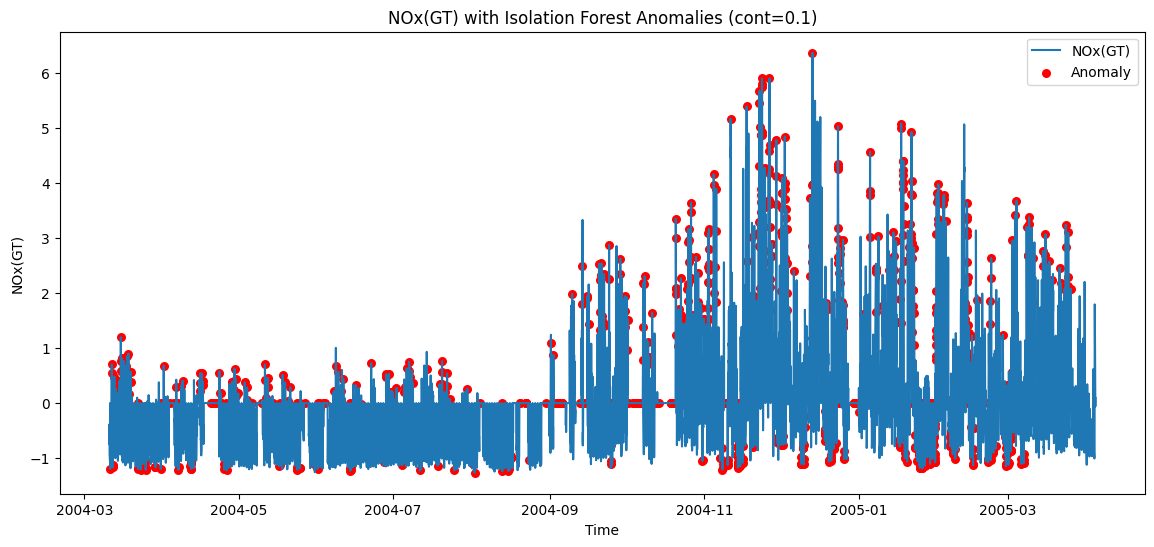

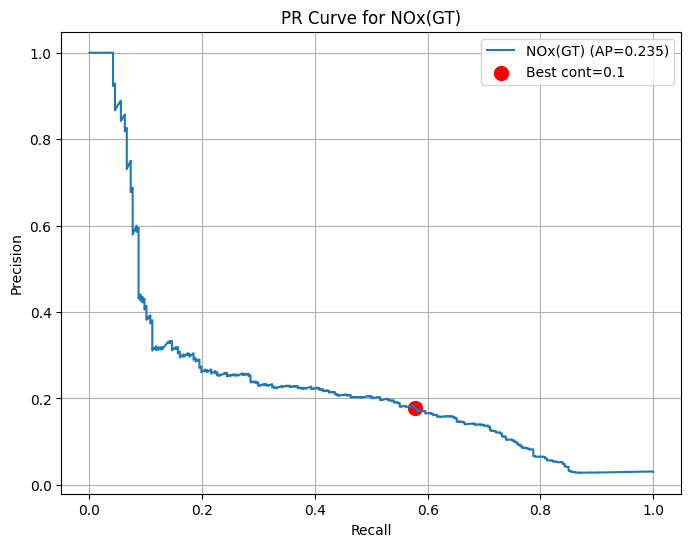


Processing target: NO2(GT)
Best contamination for NO2(GT): 0.033


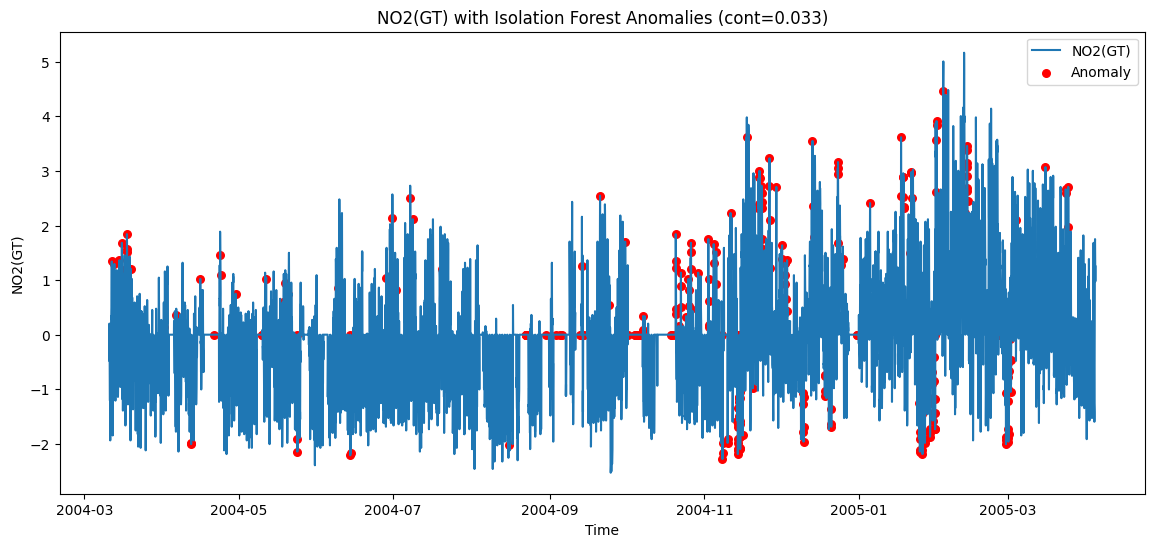

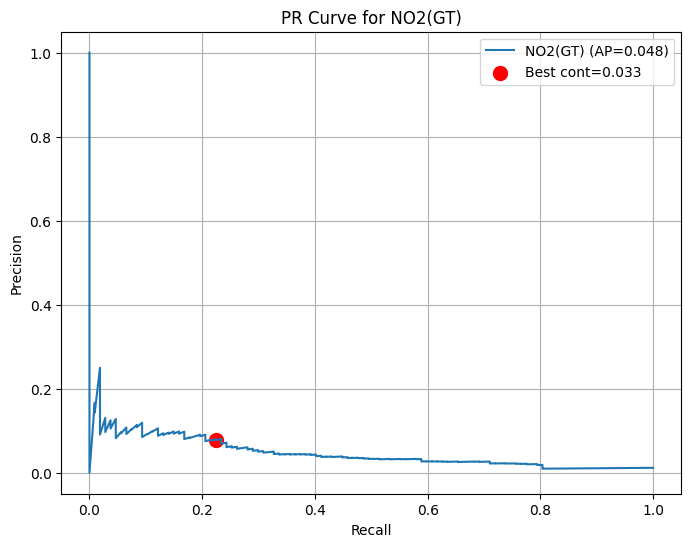

In [41]:
import anomaly_and_event_detection_utils as aed
import eda_dpp_utils

df, df_unnormalised, num_cols = eda_dpp_utils.preProcessing()
targets = [c for c in df.columns if '(GT)' in c]
non_targets = [c for c in df.columns if '(GT)' not in c]

df = aed.detect_anomalies_all_targets(df, non_targets, targets)

Higher contamination values correspond to higher recall, but lower precision. Since this task concerns air quality and pollution data, which can be potentially dangerous if left undetected, a higher recall is thus more significant than precision.

In [43]:
summary_df = aed.summarise_anomalies(df, targets, time_col='T', weekday_col='weekday', bins=10)
summary_df

/home/akshat/9417/forecasting_air_pollution/anomaly_and_event_detection_utils.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df[time_col], bins=bins))[anomaly_col].apply(lambda x: (x==-1).mean())
/home/akshat/9417/forecasting_air_pollution/anomaly_and_event_detection_utils.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df[time_col], bins=bins))[anomaly_col].apply(lambda x: (x==-1).mean())
/home/akshat/9417/forecasting_air_pollution/anomaly_and_event_detection_utils.py:108: FutureWarning: The default of observed=False is deprecated and will 

,target,analysis,is_weekend,anomaly_fraction,T_bin
0,CO(GT),weekday_vs_weekend,False,0.035837,NaN
1,CO(GT),weekday_vs_weekend,True,0.026042,NaN
2,CO(GT),T_bin,NaN,0.222222,"(-2.341, -1.798]"
3,CO(GT),T_bin,NaN,0.062092,"(-1.798, -1.261]"
4,CO(GT),T_bin,NaN,0.055387,"(-1.261, -0.724]"
5,CO(GT),T_bin,NaN,0.031921,"(-0.724, -0.187]"
6,CO(GT),T_bin,NaN,0.015680,"(-0.187, 0.35]"
7,CO(GT),T_bin,NaN,0.029232,"(0.35, 0.887]"
8,CO(GT),T_bin,NaN,0.012486,"(0.887, 1.424]"
9,CO(GT),T_bin,NaN,0.010267,"(1.424, 1.962]"


The above dataframe shows the following meteorological and calendar trends:
- Anomalous measurements in CO do not show a heavy correlation to weekends, but do correlate with temperature (higher temperature, more anomalies)
- Anomalous measurements in NMHC do not show a heavy correlation to weekends, but do correlate inversely with temperature (lower temperature, more anomalies)
- Anomalous measurements in C6H6 do not show a heavy correlation to weekends, but do correlate inversely with temperature
- Anomalous measurements in NOx do not show a heavy correlation to weekends, but do correlate extreme temperatures (very high or very low temperature, more anomalies)
- Anomalous measurements in NO2 do not show a heavy correlation to weekends, but do correlate inversely with temperature

Anomaly detection considerably bolsters model robustness by ensuring that highly noisy or extreme observations (such as very high temperatures or unusual pollution spikes) do not corrupt the training data. This helps maintain reliable forecasts by reducing the influence of fault measurements on bias and variance. Additionally, it improves data reliability as anomalous datapoints can be cleaned from a dataset such that it more accurately reflects the average scenario, free from sensor faults (like sensor drift) or other outlying conditions.